In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("FONTS.csv")

In [33]:
typeface_columns = [col for col in df.columns if "Typeface Style" in col]
df_filtered = df[["Municipality", "Photo name"] + typeface_columns]
df_melted = df_filtered.melt(id_vars=["Municipality", "Photo name"], value_vars=typeface_columns, 
                             var_name="Typeface Style Column", value_name="Typeface Style Updated")
df_melted = df_melted.dropna()  # Remove empty values
df_melted.head()


,Municipality,Photo name,Typeface Style Column,Typeface Style Updated
0,San Juan Capistrano,San_Juan_odd_39.JPG,Typeface Style (8),Sans Serif
1,Yorba Linda,YorbaLinda138.JPG,Typeface Style (8),Sans Serif
2,San Juan Capistrano,San_Juan_odd_44.JPG,Typeface Style (8),Sans Serif
3,Yorba Linda,YorbaLinda137.JPG,Typeface Style (8),Sans Serif
4,Yorba Linda,YorbaLinda136.JPG,Typeface Style (8),"Serif,Quirky"


In [4]:
df_grouped = df_melted.groupby(["Municipality", "Typeface Style Updated"]).size().reset_index(name="Count")
df_grouped

,Municipality,Typeface Style Updated,Count
0,Costa Mesa,Other,4
1,Costa Mesa,Sans Serif,61
2,Costa Mesa,"Sans Serif,Stylized",1
3,Costa Mesa,Serif,29
4,Costa Mesa,"Serif,Stylized",3
...,...,...,...
128,Aliso Viejo,Slab Serif,1
129,Aliso Viejo,Stylized,3
130,Aliso Viejo,"Stylized,Quirky,Sans Serif",1
131,Aliso Viejo,"Stylized,Sans Serif",1


In [5]:
df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style Updated", values="Count").fillna(0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
df_pivot

Typeface Style Updated,Other,"Other,Quirky","Other,Sans Serif","Other,Serif",Quirky,"Quirky,Other","Quirky,Sans Serif","Quirky,Script","Quirky,Serif","Quirky,Stylized",...,"Serif,Sans Serif","Serif,Stylized",Slab Serif,Stylized,"Stylized,Quirky","Stylized,Quirky,Sans Serif","Stylized,Sans Serif","Stylized,Script","Stylized,Serif","Stylized,Slab Serif,Serif"
Municipality,,,,,,,,,,,,,,,,,,,,,
Costa Mesa,0.036697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.027523,0.027523,0.073394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Dana Point,0.020833,0.000000,0.000000,0.000000,0.048611,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.020833,0.020833,0.062500,0.000000,0.000000,0.006944,0.000000,0.006944,0.000000
Fountain Valley,0.051813,0.010363,0.000000,0.000000,0.005181,0.010363,0.000000,0.000000,0.000000,0.005181,...,0.000000,0.015544,0.005181,0.020725,0.010363,0.000000,0.000000,0.000000,0.000000,0.000000
Fullerton,0.000000,0.000000,0.019048,0.000000,0.019048,0.000000,0.019048,0.000000,0.000000,0.000000,...,0.000000,0.057143,0.000000,0.009524,0.000000,0.000000,0.038095,0.000000,0.019048,0.000000
Laguna Beach,0.000000,0.000000,0.000000,0.000000,0.026042,0.000000,0.000000,0.005208,0.000000,0.000000,...,0.000000,0.000000,0.031250,0.072917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Laguna Hills,0.000000,0.000000,0.000000,0.000000,0.016393,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.010929,0.049180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Laguna Niguel,0.000000,0.000000,0.000000,0.000000,0.029197,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.036496,0.058394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Los Alamitos,0.032967,0.000000,0.000000,0.000000,0.082418,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.027473,0.054945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mission Viejo,0.000000,0.000000,0.000000,0.000000,0.057851,0.000000,0.000000,0.000000,0.008264,0.000000,...,0.000000,0.008264,0.016529,0.008264,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


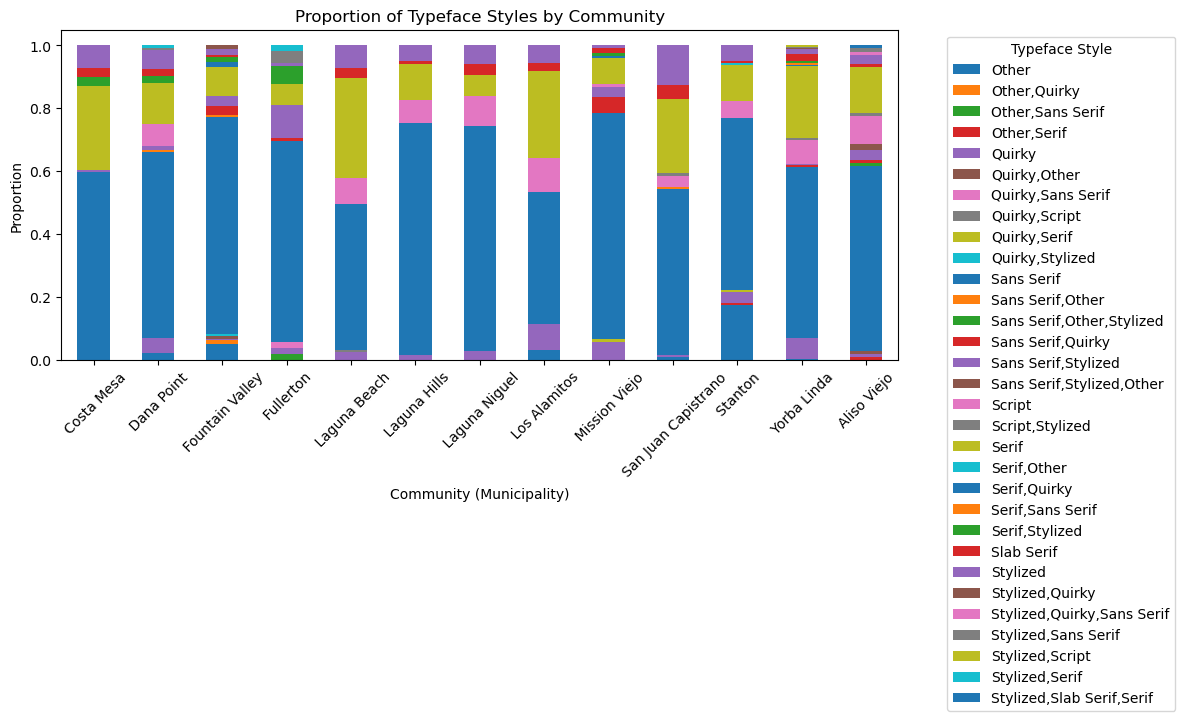

In [6]:
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Typeface Style        Total
Municipality               
 Costa Mesa            82.0
 Dana Point           111.0
 Fountain Valley      113.0
 Fullerton             65.0
 Laguna Beach         143.0
 Laguna Hills         119.0
 Laguna Niguel         84.0
 Los Alamitos         127.0
 Mission Viejo         71.0
 San Juan Capistrano   90.0
 Stanton              152.0
 Yorba Linda          185.0
Aliso Viejo            90.0


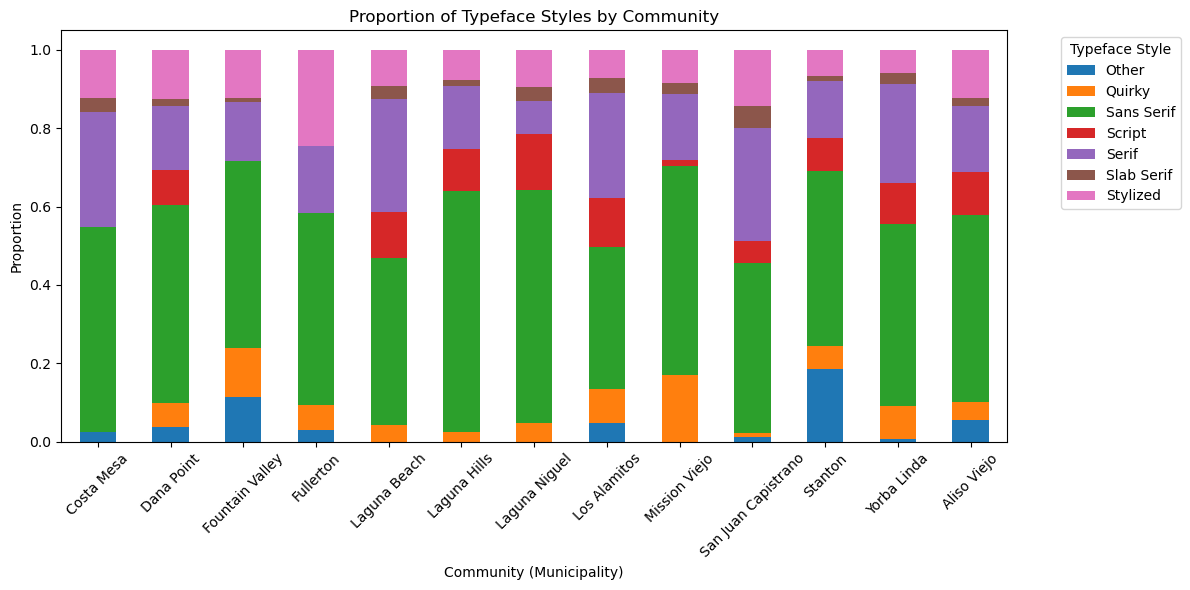

Typeface Style,Other,Quirky,Sans Serif,Script,Serif,Slab Serif,Stylized
Municipality,,,,,,,
Costa Mesa,0.024390,0.000000,0.524390,0.000000,0.292683,0.036585,0.121951
Dana Point,0.036036,0.063063,0.504505,0.090090,0.162162,0.018018,0.126126
Fountain Valley,0.115044,0.123894,0.477876,0.000000,0.150442,0.008850,0.123894
Fullerton,0.030769,0.061538,0.492308,0.000000,0.169231,0.000000,0.246154
Laguna Beach,0.000000,0.041958,0.426573,0.118881,0.286713,0.034965,0.090909
Laguna Hills,0.000000,0.025210,0.613445,0.109244,0.159664,0.016807,0.075630
Laguna Niguel,0.000000,0.047619,0.595238,0.142857,0.083333,0.035714,0.095238
Los Alamitos,0.047244,0.086614,0.362205,0.125984,0.267717,0.039370,0.070866
Mission Viejo,0.000000,0.169014,0.535211,0.014085,0.169014,0.028169,0.084507


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def load_dataset_no_duplicates():

    # Load the dataset
    df = pd.read_csv("FONTS.csv")
    
    # Identify all columns related to "Typeface Style"
    typeface_columns = [col for col in df.columns if "Typeface Style" in col]
    
    # Initialize an empty list to store (Municipality, Typeface Style) pairs
    records = []
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        municipality = row["Municipality"]
        # Use a set to avoid duplicate typefaces within the same row
        fonts_set = set()
        
        # Loop over each typeface column
        for col in typeface_columns:
            value = row[col]
            if pd.notna(value):
                # Split the value by comma to get individual fonts,
                # and remove any leading/trailing whitespace
                fonts = [font.strip() for font in str(value).split(',') if font.strip() != ""]
                for font in fonts:
                    fonts_set.add(font)
        
        # Add each unique font to the records list with its municipality
        for font in fonts_set:
            records.append({"Municipality": municipality, "Typeface Style": font})
    
    # Create a new DataFrame from the records
    df_fonts = pd.DataFrame(records)
    # Group by Municipality and Typeface Style to count occurrences
    df_grouped = df_fonts.groupby(["Municipality", "Typeface Style"]).size().reset_index(name="Count")
    # Pivot the table so that each row represents a municipality and each column a typeface style
    df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style", values="Count").fillna(0)
    df_pivot["Total"] = df_pivot.sum(axis=1)
    print(df_pivot[["Total"]])
    del df_pivot["Total"]
    # Convert counts to proportions by dividing each row by its sum
    df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
    df_pivot.index = df_pivot.index.str.strip()
    return df_pivot

def load_dataset():
    # Load the dataset
    df = pd.read_csv("FONTS.csv")
    
    # Identify all columns related to "Typeface Style"
    typeface_columns = [col for col in df.columns if "Typeface Style" in col]
    
    # Initialize an empty list to store (Municipality, Typeface Style) pairs
    records = []
    
    # Iterate over each row in the DataFrame
    for _, row in df.iterrows():
        municipality = row["Municipality"]
        
        # Loop over each typeface column
        for col in typeface_columns:
            value = row[col]
            if pd.notna(value):
                # split comma-separated combos, keep duplicates if they exist
                for font in (f.strip() for f in str(value).split(",") if f.strip()):
                    records.append({"Municipality": municipality,
                                    "Typeface Style": font})
    
    # Create a new DataFrame from the records
    df_fonts = pd.DataFrame(records)
    # Group by Municipality and Typeface Style to count occurrences
    df_grouped = df_fonts.groupby(["Municipality", "Typeface Style"]).size().reset_index(name="Count")
    # Pivot the table so that each row represents a municipality and each column a typeface style
    df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style", values="Count").fillna(0)
    df_pivot["Total"] = df_pivot.sum(axis=1)
    print(df_pivot[["Total"]])
    del df_pivot["Total"]
    # Convert counts to proportions by dividing each row by its sum
    df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)
    df_pivot.index = df_pivot.index.str.strip()
    return df_pivot

# df_pivot = load_dataset()
df_pivot = load_dataset_no_duplicates()

# Plot the results as a stacked bar chart
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df_pivot

In [8]:
df = pd.read_csv("data/incomePercentages.csv")
# Step 1: Get the row with city names (first row)
city_row = df.iloc[0]

# Step 2: Keep only the columns labeled "Value" in the second row
value_columns = []
city_names = []

for i, col in enumerate(df.iloc[1]):
    if col == "Value":
        value_columns.append(i)
        city_names.append(city_row[i].split(",")[0])

# Step 3: Extract rows starting from the third row (skip header rows)
df_clean = df.iloc[2:, value_columns]
# print(df_clean.head())
df_clean.columns = city_names
# Convert percentage strings to float
df_clean = df_clean.map(lambda x: float(x.strip('%')) if isinstance(x, str) else pd.nan)
# drops row that contains total percentages (was always 100%)
df_clean = df_clean.iloc[1:].reset_index(drop=True)

/var/folders/vf/rpgn1jr93838304d9h79hw300000gn/T/ipykernel_36649/1256491585.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  city_names.append(city_row[i].split(",")[0])


(16, 46)


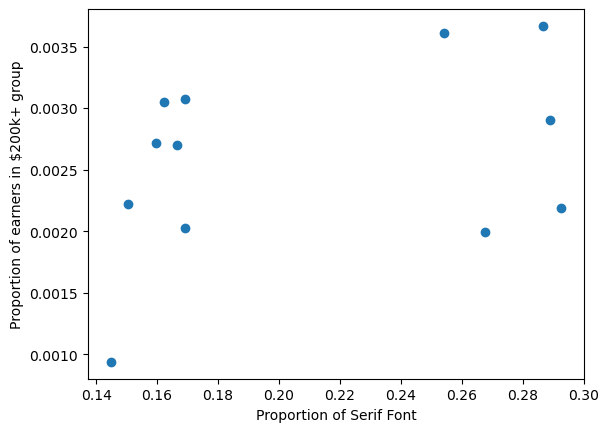

In [9]:
print(df_clean.shape)

df_clean.index = [
    'Less than $10,000',
    '$10,000 to $14,999',
    '$15,000 to $19,999',
    '$20,000 to $24,999',
    '$25,000 to $29,999',
    '$30,000 to $34,999',
    '$35,000 to $39,999',
    '$40,000 to $44,999',
    '$45,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $74,999',
    '$75,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 to $199,999',
    '$200,000 or more'
]

mapping1 = {
    # “10–45” bin
    'Less than $10,000':     '$10-45k',
    '$10,000 to $14,999':    '$10-45k',
    '$15,000 to $19,999':    '$10-45k',
    '$20,000 to $24,999':    '$10-45k',
    '$25,000 to $29,999':    '$10-45k',
    '$30,000 to $34,999':    '$10-45k',
    '$35,000 to $39,999':    '$10-45k',
    '$40,000 to $44,999':    '$10-45k',

    # “45–100” bin
    '$45,000 to $49,999':    '$45-100k',
    '$50,000 to $59,999':    '$45-100k',
    '$60,000 to $74,999':    '$45-100k',
    '$75,000 to $99,999':    '$45-100k',

    # “100–150” bin
    '$100,000 to $124,999':  '$100-150k',
    '$125,000 to $149,999':  '$100-150k',

    # “150–200” bin
    '$150,000 to $199,999':  '$150-200k',

    # “200+” bin
    '$200,000 or more':      '$200k+'
}

mapping2 = {
    # “10–45” bin
    'Less than $10,000':     '$10-100k',
    '$10,000 to $14,999':    '$10-100k',
    '$15,000 to $19,999':    '$10-100k',
    '$20,000 to $24,999':    '$10-100k',
    '$25,000 to $29,999':    '$10-100k',
    '$30,000 to $34,999':    '$10-100k',
    '$35,000 to $39,999':    '$10-100k',
    '$40,000 to $44,999':    '$10-100k',

    # “45–100” bin
    '$45,000 to $49,999':    '$10-100k',
    '$50,000 to $59,999':    '$10-100k',
    '$60,000 to $74,999':    '$10-100k',
    '$75,000 to $99,999':    '$10-100k',

    # “100–150” bin
    '$100,000 to $124,999':  '$100-200k',
    '$125,000 to $149,999':  '$100-200k',

    # “150–200” bin
    '$150,000 to $199,999':  '$100-200k',

    # “200+” bin
    '$200,000 or more':      '$200k+'
}


incomes1 = (
    df_clean
    .rename(index=mapping1)  # apply the new 5‐bin labels
    .groupby(level=0)   # group by those 5 labels
    .sum()                  # sum all city columns
)

incomes2 = (
    df_clean
    .rename(index=mapping2)  # apply the new 5‐bin labels
    .groupby(level=0)   # group by those 5 labels
    .sum()                  # sum all city columns
)

# NEW FACTORS TO TRY
# could try ethnicity as a group 
# population density
# percentage of first gen, second-gen immigrants
# job type - blue collar vs white collar, could be found as primary form of employment in the area
# age cohorts
# political affiliation
# is city master planned

font_proportions = df_pivot.T 
font_proportions = font_proportions.drop("Laguna Niguel", axis=1) # no income data for laguna niguel, so removing it

# Trying to plot serif proportions by city
common_cities = incomes2.columns.intersection(font_proportions.columns)
incomes_by_city = incomes2[common_cities]

# order columns correctly
ordered_cities = font_proportions.columns 
incomes_df = incomes_by_city[ordered_cities] / 100

xfont = "Serif"
income_group = "$200k+"
plt.scatter(x=font_proportions.loc[xfont], y=incomes_df.loc[income_group].div(100))
plt.xlabel(f"Proportion of {xfont} Font")
plt.ylabel(f"Proportion of earners in {income_group} group")
plt.show()


In [10]:
# print(incomes_df.shape, font_proportions.shape)
incomes_df.head()
# print(font_proportions.loc["Serif"], "\n\n\n\n",incomes2.loc["$200k+"])

,Costa Mesa,Dana Point,Fountain Valley,Fullerton,Laguna Beach,Laguna Hills,Los Alamitos,Mission Viejo,San Juan Capistrano,Stanton,Yorba Linda,Aliso Viejo
$10-100k,0.4460,0.3668,0.4409,0.4811,0.3834,0.3986,0.5098,0.3417,0.3622,0.5993,0.3133,0.3253
$100-200k,0.3356,0.3284,0.3369,0.3161,0.2498,0.3298,0.2906,0.3508,0.3478,0.3070,0.3253,0.4051
$200k+,0.2185,0.3048,0.2221,0.2028,0.3668,0.2715,0.1997,0.3076,0.2900,0.0937,0.3613,0.2697


In [11]:
#  Costa Mesa            82.0
#  Dana Point           111.0
#  Fountain Valley      113.0
#  Fullerton             65.0
#  Laguna Beach         143.0
#  Laguna Hills         119.0
#  Laguna Niguel         84.0
#  Los Alamitos         127.0
#  Mission Viejo         71.0
#  San Juan Capistrano   90.0
#  Stanton              152.0
#  Yorba Linda          185.0
#  not included: Laguna Niguel 
incomes2["Yorba Linda"]

$10-100k     31.33
$100-200k    32.53
$200k+       36.13
Name: Yorba Linda, dtype: float64

In [12]:
# setting up race dataframe
# read in, skipping the very first row, and treat rows 2&3 as a two-level header
df = pd.read_csv(
    'data/race.csv',
    skiprows=1,
    header=[0, 1],
    index_col=0,
    dtype=str   # keep as string so % signs stay intact
)

# slice out only the 'Value' columns
race_df = df.xs('Value', axis=1, level=1)

# drop the now-useless column-level name
race_df.columns.name = None

# rename the index for clarity
race_df.index.name = 'Race Category'

# drop "Total:" row
race_df = race_df.drop("Total:", axis=0)

# change percentages to float values 
race_df = race_df.map(lambda x: float(x.rstrip('%'))/100)

# remove extra ", CA" string from city names 
column_list = race_df.columns.to_list()
race_df.columns = [item[:-4] for item in column_list]

# drop "Orange County" column since we will not need
race_df = race_df.drop("Orange County", axis=1)

# drop some races 
race_df = race_df.drop(["American Indian and Alaska Native alone", "Native Hawaiian and Other Pacific Islander alone",
                        "Two races including Some Other Race", "Two races excluding Some Other Race, and three or more races"]
                       , axis=0)

race_df = race_df[font_proportions.columns]

In [13]:
race_df

,Costa Mesa,Dana Point,Fountain Valley,Fullerton,Laguna Beach,Laguna Hills,Los Alamitos,Mission Viejo,San Juan Capistrano,Stanton,Yorba Linda,Aliso Viejo
Race Category,,,,,,,,,,,,
White alone,0.5270,0.7858,0.4306,0.4301,0.8401,0.5805,0.5208,0.6424,0.6267,0.2878,0.5733,0.6095
Black or African American alone,0.0160,0.0191,0.0117,0.0209,0.0043,0.0110,0.0415,0.0101,0.0054,0.0144,0.0093,0.0215
Asian alone,0.0880,0.0331,0.3655,0.2452,0.0375,0.1569,0.1652,0.1440,0.0391,0.2716,0.2555,0.1688
Some Other Race alone,0.1788,0.0603,0.0537,0.1461,0.0232,0.1035,0.1300,0.0538,0.1392,0.2775,0.0426,0.0632
Two or More Races:,0.1694,0.1007,0.1253,0.1490,0.0907,0.1418,0.1374,0.1417,0.1834,0.1312,0.1165,0.1356


In [14]:
font_proportions

Municipality,Costa Mesa,Dana Point,Fountain Valley,Fullerton,Laguna Beach,Laguna Hills,Los Alamitos,Mission Viejo,San Juan Capistrano,Stanton,Yorba Linda,Aliso Viejo
Typeface Style,,,,,,,,,,,,
Other,0.024390,0.036036,0.115044,0.030769,0.000000,0.000000,0.047244,0.000000,0.011111,0.184211,0.005405,0.055556
Quirky,0.000000,0.063063,0.123894,0.061538,0.041958,0.025210,0.086614,0.169014,0.011111,0.059211,0.086486,0.044444
Sans Serif,0.524390,0.504505,0.477876,0.492308,0.426573,0.613445,0.362205,0.535211,0.433333,0.447368,0.464865,0.477778
Script,0.000000,0.090090,0.000000,0.000000,0.118881,0.109244,0.125984,0.014085,0.055556,0.085526,0.102703,0.111111
Serif,0.292683,0.162162,0.150442,0.169231,0.286713,0.159664,0.267717,0.169014,0.288889,0.144737,0.254054,0.166667
Slab Serif,0.036585,0.018018,0.008850,0.000000,0.034965,0.016807,0.039370,0.028169,0.055556,0.013158,0.027027,0.022222
Stylized,0.121951,0.126126,0.123894,0.246154,0.090909,0.075630,0.070866,0.084507,0.144444,0.065789,0.059459,0.122222


In [15]:
incomes_df

,Costa Mesa,Dana Point,Fountain Valley,Fullerton,Laguna Beach,Laguna Hills,Los Alamitos,Mission Viejo,San Juan Capistrano,Stanton,Yorba Linda,Aliso Viejo
$10-100k,0.4460,0.3668,0.4409,0.4811,0.3834,0.3986,0.5098,0.3417,0.3622,0.5993,0.3133,0.3253
$100-200k,0.3356,0.3284,0.3369,0.3161,0.2498,0.3298,0.2906,0.3508,0.3478,0.3070,0.3253,0.4051
$200k+,0.2185,0.3048,0.2221,0.2028,0.3668,0.2715,0.1997,0.3076,0.2900,0.0937,0.3613,0.2697


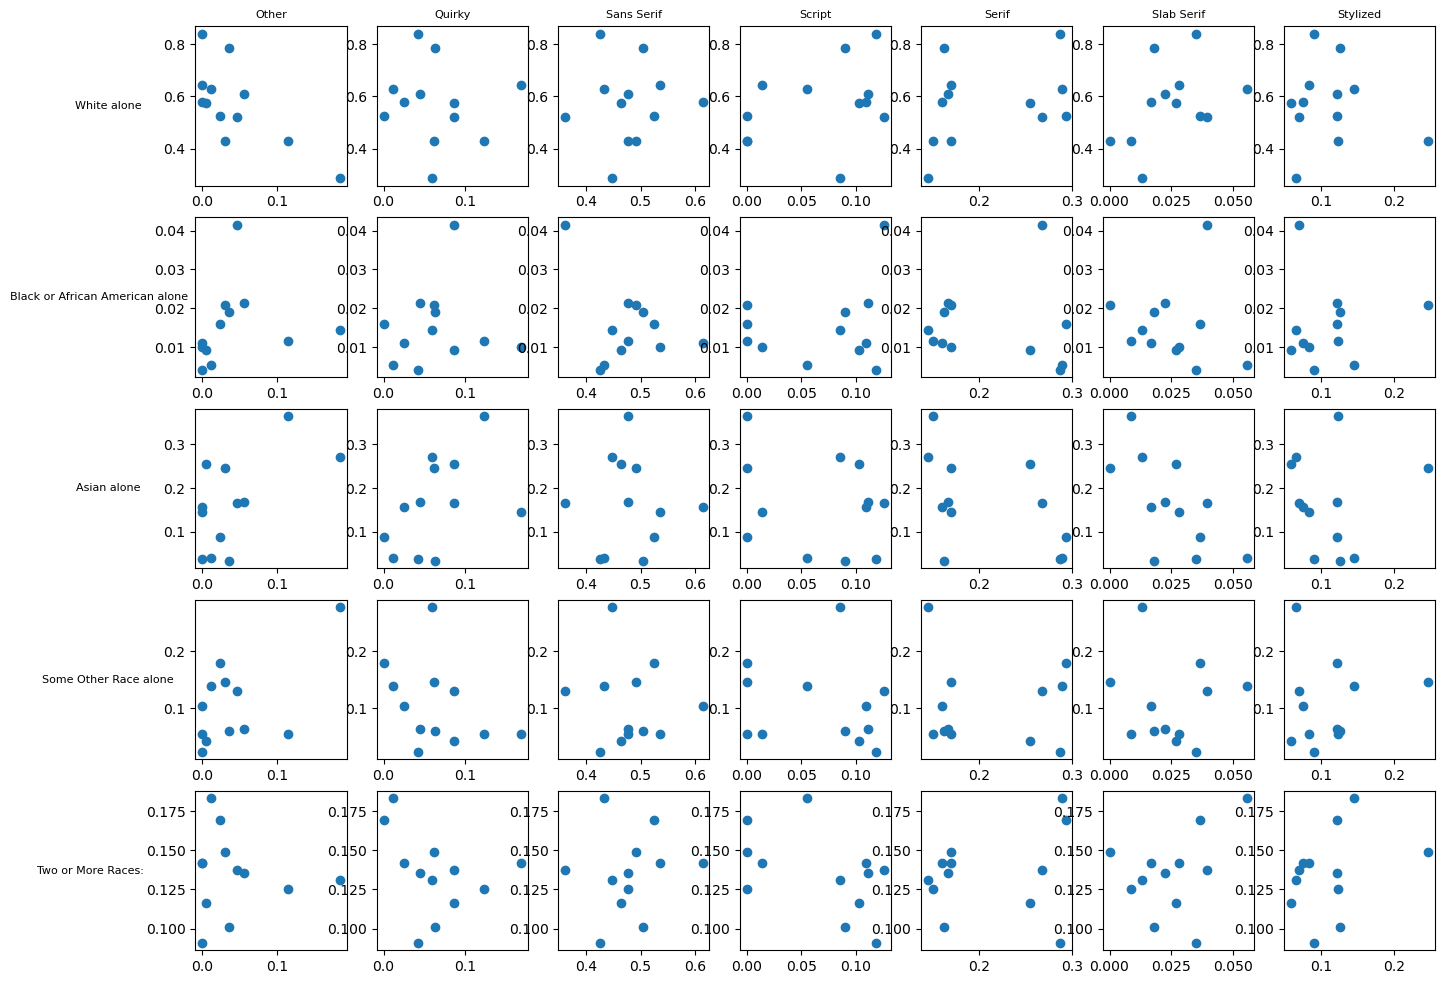

In [16]:
# race_selected is the correct ordering of cities
assert font_proportions.columns.to_list() == race_df.columns.to_list()

races = list(race_df.index)
fonts = list(font_proportions.index)

fig, axes = plt.subplots(nrows=len(races), ncols=len(fonts), figsize=(16, 12))

# [ .  .  .
#   .  .  .
#   .  .  .  ] 

for i, race in enumerate(races):
    for j, font in enumerate(fonts):
        axes[i, j].scatter(x=font_proportions.loc[font, race_df.columns], y=race_df.loc[race, font_proportions.columns])
        if j == 0:
            axes[i, j].set_ylabel(race, fontsize=8, rotation=0, labelpad=40, va='center')

        # Only set title on the top row
        if i == 0:
            axes[i, j].set_title(font, fontsize=8)

# fig.supxlabel(f"Proportion of particular font")
# fig.supylabel(f"Proportion of people in a race group")
# plt.tight_layout()
plt.show()

In [17]:
list(font_proportions.index)

['Other', 'Quirky', 'Sans Serif', 'Script', 'Serif', 'Slab Serif', 'Stylized']

In [18]:
from sklearn.linear_model import LinearRegression

x = race_df.loc["Asian alone"].values.reshape(-1,1)
y = font_proportions.loc["Serif"].values.reshape(-1,1)

model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.26423355517539604

                            OLS Regression Results                            
Dep. Variable:                  Serif   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.376
Date:                Sun, 19 Oct 2025   Prob (F-statistic):              0.268
Time:                        17:15:49   Log-Likelihood:                 17.668
No. Observations:                  12   AIC:                            -31.34
Df Residuals:                      10   BIC:                            -30.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1283      0.071      1.799      

/Users/purugajare/anaconda3/envs/cs178/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Users/purugajare/anaconda3/envs/cs178/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


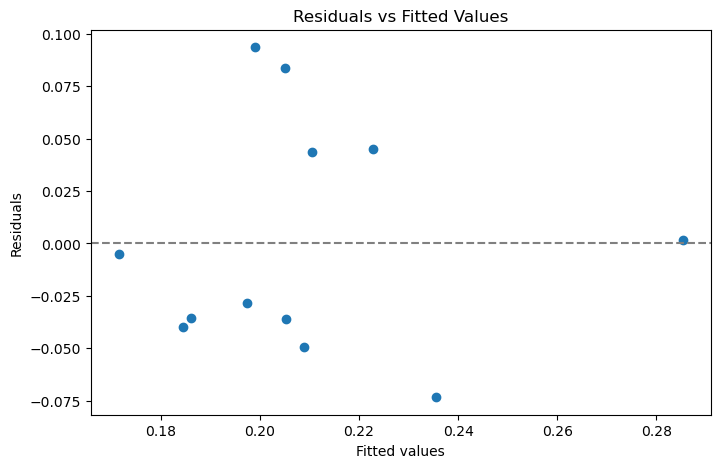

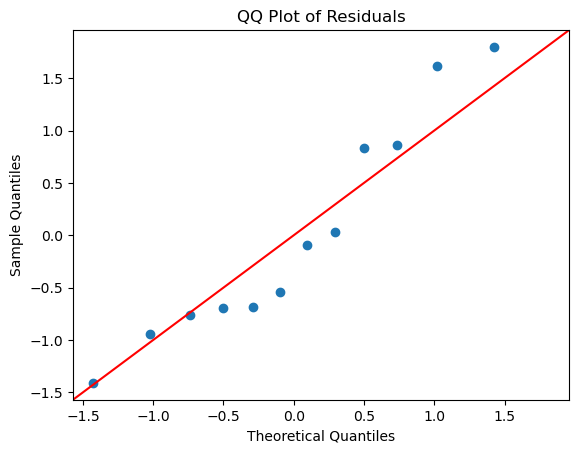

In [19]:
import statsmodels.api as sm

selected_race = "White alone"
# selected_earn = "$10-100k"
selected_earn = "$100-200k"
# selected_earn = "$200k+"

x = race_df.loc[selected_race]
# x = incomes_df.loc[selected_earn]
y = font_proportions.loc["Serif"]

x = sm.add_constant(x)  # Adds intercept term
ols_model = sm.OLS(y, x).fit()
print(ols_model.summary())

regress_df = pd.DataFrame({
    "race": race_df.loc[selected_race],
    "earn": incomes_df.loc[selected_earn]
})

x = regress_df
x = sm.add_constant(x)  # Adds intercept term
ols_model = sm.OLS(y, x).fit()
print(ols_model.summary())

residuals = ols_model.resid  # same as y - ols_model.fittedvalues

# Plot residuals vs. fitted values
plt.figure(figsize=(8, 5))
plt.scatter(ols_model.fittedvalues, residuals)
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot of Residuals")
plt.show()

Turns out that we cant use typical distribution tests like t and z bc they rely on an assumption of normality -> which you need a sample size of at least 30 for. 


So I'm going to try using permutation tests, where we create a collection of correlation values from randomly shuffling the data -> ie bs values. Then we compare that r squared to the real correlation. So we count how many correlations from the bs distribution are as extreme as the correlation we see. That proportion is our p value. 

In [20]:
font_proportions

Municipality,Costa Mesa,Dana Point,Fountain Valley,Fullerton,Laguna Beach,Laguna Hills,Los Alamitos,Mission Viejo,San Juan Capistrano,Stanton,Yorba Linda,Aliso Viejo
Typeface Style,,,,,,,,,,,,
Other,0.024390,0.036036,0.115044,0.030769,0.000000,0.000000,0.047244,0.000000,0.011111,0.184211,0.005405,0.055556
Quirky,0.000000,0.063063,0.123894,0.061538,0.041958,0.025210,0.086614,0.169014,0.011111,0.059211,0.086486,0.044444
Sans Serif,0.524390,0.504505,0.477876,0.492308,0.426573,0.613445,0.362205,0.535211,0.433333,0.447368,0.464865,0.477778
Script,0.000000,0.090090,0.000000,0.000000,0.118881,0.109244,0.125984,0.014085,0.055556,0.085526,0.102703,0.111111
Serif,0.292683,0.162162,0.150442,0.169231,0.286713,0.159664,0.267717,0.169014,0.288889,0.144737,0.254054,0.166667
Slab Serif,0.036585,0.018018,0.008850,0.000000,0.034965,0.016807,0.039370,0.028169,0.055556,0.013158,0.027027,0.022222
Stylized,0.121951,0.126126,0.123894,0.246154,0.090909,0.075630,0.070866,0.084507,0.144444,0.065789,0.059459,0.122222


In [21]:
# using race to model font proportions individually
import numpy as np
import statsmodels.api as sm


def create_permutations(selected_race, selected_font, num_permuations=1000):
    y = font_proportions.loc[selected_font].values.reshape(-1,1)
    
    correlations = []
    for i in range(num_permuations):
        x = race_df.loc[selected_race].values.reshape(-1,1)
        x = sm.add_constant(x)  # Adds intercept term
        y = np.random.permutation(y)

        ols_model = sm.OLS(y, x).fit()
        correlations.append(ols_model.rsquared)
        
    
    return correlations


def calculate_p_val(selected_race, selected_font):
    null_distr = sorted(create_permutations(selected_race, selected_font))
    print("Max of null_distr is", max(null_distr), "and the average is",sum(null_distr) / len(null_distr))
    
    x = race_df.loc[selected_race]
    y = font_proportions.loc[selected_font]
    
    x = sm.add_constant(x)  # Adds intercept term
    ols_model = sm.OLS(y, x).fit()
    correlation = ols_model.rsquared
    print(f"Real R^2 of {selected_race} and {selected_font} is ", correlation)
    index = -1
    for i in range(len(null_distr)):
        if null_distr[i] >= correlation:
            index = i
            break
    return_val = ""
    if index == -1:
        return_val = 0
    else:
        return_val =  (len(null_distr) - i)  / len(null_distr)
    print("Probability of attaining this value under the null distribution (ie. confidence in this value) is", return_val)
    return correlation, return_val


exclude_race = {"Black or African American alone"}
exclude_font = {"Slab Serif	", "Quirky"}  #  exclude a few because they have too low proportions to be reliable results
table = [[font for font in font_proportions.index]]
for race in race_df.index:
    if race in exclude_race:
        continue
    race_list = [race]
    for font in font_proportions.index:
        if font in exclude_font:
            continue
        correlation, p_val = calculate_p_val(race, font)
        race_list.append((round(correlation, 3), round(p_val, 3)))
    table.append(race_list)

print('\n\n\n',"                ", table[0])
for row in table[1:]:
    print(row)

Max of null_distr is 0.6156841981828438 and the average is 0.08833561144385571
Real R^2 of White alone and Other is  0.5052963743666579
Probability of attaining this value under the null distribution (ie. confidence in this value) is 0.01
Max of null_distr is 0.8196398136428263 and the average is 0.09245539180044784
Real R^2 of White alone and Sans Serif is  0.0023908405278655342
Probability of attaining this value under the null distribution (ie. confidence in this value) is 0.892
Max of null_distr is 0.6060122593648002 and the average is 0.09317427614361057
Real R^2 of White alone and Script is  0.12757419093206135
Probability of attaining this value under the null distribution (ie. confidence in this value) is 0.256
Max of null_distr is 0.6509088492340109 and the average is 0.08960540066351694
Real R^2 of White alone and Serif is  0.12096211302965765
Probability of attaining this value under the null distribution (ie. confidence in this value) is 0.268
Max of null_distr is 0.7192239

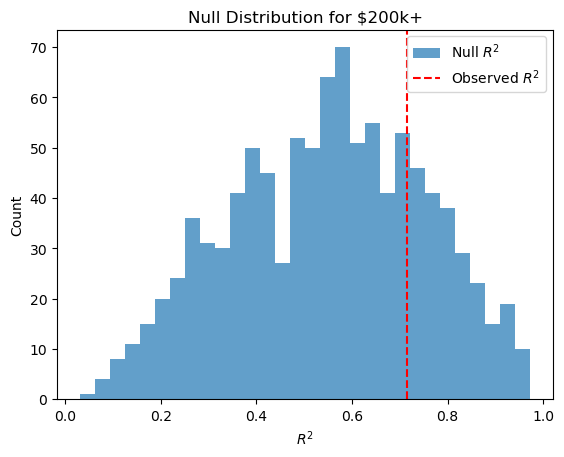

Max of null_distr is 0.9712578284408581 and the average is 0.5328640395570969
Real R^2 of x=proportions of fonts and y = proportion of $200k+ earners is  0.7145832203875266
Probability of attaining this value under the null distribution (ie. confidence in this value) is 0.205


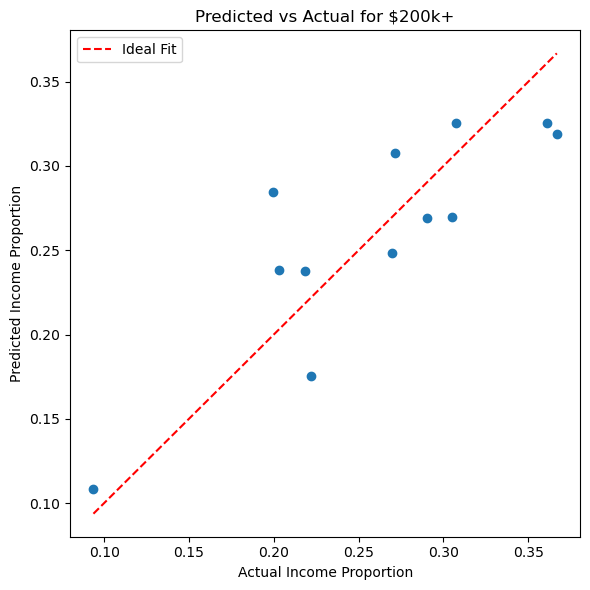

In [22]:
# doing the same thing except with proportions of font predicting income

def create_permutations(selected_income, num_permutations=1000):
    X = font_proportions.T.values  # shape: (n_cities, n_fonts)
    X = sm.add_constant(X)
    y = incomes_df.loc[selected_income].values.reshape(-1, 1)
    
    correlations = []
    for i in range(num_permutations):
        y_perm = np.random.permutation(y)
        ols_model = sm.OLS(y_perm, X).fit()
        correlations.append(ols_model.rsquared)
    return correlations

def calculate_p_val(selected_income):
    null_distr = sorted(create_permutations(selected_income))
    print("Max of null_distr is", max(null_distr), "and the average is",sum(null_distr) / len(null_distr))
    
    X = font_proportions.T.values  # shape: (n_cities, n_fonts)
    X = sm.add_constant(X)
    y = incomes_df.loc[selected_income].values.reshape(-1, 1)
    
    ols_model = sm.OLS(y, X).fit()
    correlation = ols_model.rsquared
    print(f"Real R^2 of x=proportions of fonts and y = proportion of {selected_income} earners is ", correlation)
    index = -1
    for i in range(len(null_distr)):
        if null_distr[i] >= correlation:
            index = i
            break
    return_val = ""
    if index == -1:
        return_val = 0
    else:
        return_val =  (len(null_distr) - i)  / len(null_distr)
    print("Probability of attaining this value under the null distribution (ie. confidence in this value) is", return_val)
    return correlation, return_val

def plot_predicted_vs_actual(selected_income):
    # predictors: all font proportions for each city
    X = font_proportions.T.values  # shape: (n_cities, n_fonts)
    X = sm.add_constant(X)         # add intercept
    y = incomes_df.loc[selected_income].values  # shape: (n_cities,)
    
    model = sm.OLS(y, X).fit()
    y_pred = model.fittedvalues
    
    plt.figure(figsize=(6,6))
    plt.scatter(y, y_pred)
    plt.xlabel("Actual Income Proportion")
    plt.ylabel("Predicted Income Proportion")
    plt.title(f"Predicted vs Actual for {selected_income}")
    plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_null_distribution(selected_income, num_permutations=1000):
    null_distr = create_permutations(selected_income, num_permutations)
    X = font_proportions.T.values
    X = sm.add_constant(X)
    y = incomes_df.loc[selected_income].values.reshape(-1, 1)
    ols_model = sm.OLS(y, X).fit()
    real_r2 = ols_model.rsquared

    plt.hist(null_distr, bins=30, alpha=0.7, label="Null $R^2$")
    plt.axvline(real_r2, color='red', linestyle='--', label='Observed $R^2$')
    plt.xlabel("$R^2$")
    plt.ylabel("Count")
    plt.title(f"Null Distribution for {selected_income}")
    plt.legend()
    plt.show()

plot_null_distribution("$200k+")

calculate_p_val("$200k+")
plot_predicted_vs_actual("$200k+")


In [23]:
# now testing if the number of predictors could be reduced by iteratively fitting models with more predictors

import statsmodels.api as sm

def forward_selection_by_adj_r2(selected_income, 
                                font_proportions_df, 
                                incomes_df, 
                                verbose=True):
    """
    Perform forward selection (stepwise addition) of font predictors based on adjusted R^2.

    Parameters
    ----------
    selected_income : str
        The row label in `incomes_df` corresponding to the income bracket you want to predict 
        (e.g. "$200k+").
    font_proportions_df : pandas.DataFrame
        A DataFrame of shape (n_fonts, n_cities), where each row is a font style and each column 
        is a city.  Values are the proportion of signs in that city using that font.
    incomes_df : pandas.DataFrame
        A DataFrame of shape (n_income_brackets, n_cities), where each row is an income bracket 
        (e.g. "$100-200k") and each column is a city.  Values are the proportion of earners in 
        that bracket.
    verbose : bool (default=True)
        If True, prints out each step and the resulting adjusted R^2.

    Returns
    -------
    selected_predictors : list of str
        The list of font styles selected by forward selection (in the order they were added).
    best_models : dict
        A dictionary mapping `tuple(selected_predictors)` → the fitted OLS model (statsmodels RegressionResults).
        At the end, you can inspect `best_models[tuple(selected_predictors)]` to see the final summary.

    Example
    -------
    >>> selected, models = forward_selection_by_adj_r2("$200k+", font_proportions, incomes_df)
    >>> print("Final set of fonts:", selected)
    >>> print(models[tuple(selected)].summary())
    """
    # — 1. Prepare X_all (cities × fonts) and y (cities × 1) for the given income bracket
    #   We assume font_proportions_df.columns == incomes_df.columns (same city order).
    fonts = list(font_proportions_df.index)  # e.g. ["Other", "Quirky", …]
    cities = list(incomes_df.columns)        # e.g. ["Costa Mesa", "Dana Point", …]

    # X_all: a DataFrame of shape (n_cities, n_fonts)
    X_all = font_proportions_df.loc[fonts, cities].T.copy()
    # y: 1D array of length n_cities
    y = incomes_df.loc[selected_income, cities].values

    selected_predictors = []
    remaining_predictors = fonts.copy()
    best_models = {}

    # Start with no predictors
    current_adj_r2 = 0.0

    if verbose:
        print(f"\nForward selection for income bracket: {selected_income}\n"
              f"{'-'*50}")
    
    while remaining_predictors:
        trial_results = []
        # For each candidate font in the remaining list, fit model with (selected + candidate)
        for candidate in remaining_predictors:
            trial_feats = selected_predictors + [candidate]
            X_trial = X_all[trial_feats]
            X_trial = sm.add_constant(X_trial, has_constant='add')
            model = sm.OLS(y, X_trial).fit()
            adj_r2 = model.rsquared_adj
            trial_results.append((candidate, adj_r2, model))

        # Find the candidate that gives the largest adjusted R^2
        candidate, best_adj_r2_for_candidate, best_model_candidate = max(
            trial_results, key=lambda tup: tup[1]
        )

        # If that best_adj_r2 is higher than our current, accept it; otherwise stop
        if best_adj_r2_for_candidate > current_adj_r2:
            selected_predictors.append(candidate)
            remaining_predictors.remove(candidate)
            current_adj_r2 = best_adj_r2_for_candidate
            best_models[tuple(selected_predictors)] = best_model_candidate

            if verbose:
                print(f"Added '{candidate}' →  adjusted R^2 = {current_adj_r2:.4f}")
        else:
            # No candidate improved adjusted R^2, so we stop
            if verbose:
                print("\nNo further improvement in adjusted R^2.  Stopping.")
            break

    if verbose:
        print(f"\nFinal selected fonts (in order): {selected_predictors}")
        print(f"Number of predictors chosen: {len(selected_predictors)}")
        print(f"Final model adjusted R^2 = {current_adj_r2:.4f}")
        print(f"{'-'*50}\n")

    return selected_predictors, best_models


# CHOOSE INCOME HERE

selected_income = ["$10-100k", "$100-200k", "$200k+"][0]
fonts_selected, models_dict = forward_selection_by_adj_r2(
    selected_income   =  selected_income,
    font_proportions_df = font_proportions,
    incomes_df          = incomes_df,
    verbose             = True
)



Forward selection for income bracket: $10-100k
--------------------------------------------------
Added 'Other' →  adjusted R^2 = 0.4579

No further improvement in adjusted R^2.  Stopping.

Final selected fonts (in order): ['Other']
Number of predictors chosen: 1
Final model adjusted R^2 = 0.4579
--------------------------------------------------



In [24]:
# use selected fonts to run a regression
# essentially, based on p-values, "Other" is a good predictor that adds to the model, but we're not sure that "Stylized is"
# but we cannot trust the p-values of the coeffecients here because our sample size is too small
# so we now run the permutations again to generate p-values for the calculated coeffecients


X = font_proportions.loc[list(fonts_selected)].T.values  # shape: (n_cities, n_fonts)
X = sm.add_constant(X)
y = incomes_df.loc[selected_income].values.reshape(-1, 1)
ols_model = sm.OLS(y, X).fit()
correlation = ols_model.rsquared
print(ols_model.summary()) 

def permute_coef_pval(selected_income, fonts_selected, num_permutations=1000):
    X = font_proportions.loc[[fonts_selected]].T.values
    X = sm.add_constant(X)
    y = incomes_df.loc[selected_income].values.reshape(-1, 1)

    ols_model = sm.OLS(y, X).fit()
    real_coef = ols_model.params[1]  # for first font in fonts_selected

    null_coefs = []
    for _ in range(num_permutations):
        y_perm = np.random.permutation(y)
        model_perm = sm.OLS(y_perm, X).fit()
        null_coefs.append(model_perm.params[1])  # compare to the real coef

    # Two-sided p-value: how often is abs(null_coef) >= abs(real_coef)
    p_val = np.mean(np.abs(null_coefs) >= np.abs(real_coef))
    return real_coef, p_val

for font in fonts_selected:
    coef, perm_pval = permute_coef_pval(selected_income, font)
    print(f"Permutation p-value for {font}: {perm_pval:.3f}")


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     10.29
Date:                Sun, 19 Oct 2025   Prob (F-statistic):            0.00936
Time:                        17:15:52   Log-Likelihood:                 17.352
No. Observations:                  12   AIC:                            -30.70
Df Residuals:                      10   BIC:                            -29.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3678      0.023     15.935      0.0

/Users/purugajare/anaconda3/envs/cs178/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


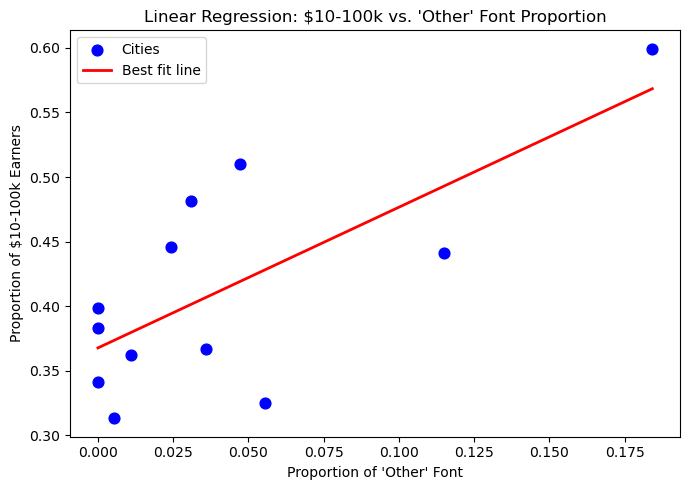

In [25]:
# 
# 3d plot of model: y = B0 + B1*X1 + B2*X2
# where B0 = intercept
# B1 = coeffecient of proportion of first font
# B2 = coeffecient of proportion of second font

if len(fonts_selected) == 2:
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # needed to register 3D projection
    
    # 1) Extract the two selected fonts and the outcome:
    fonts_sel = fonts_selected
    cities = list(incomes_df.columns)  # same column order in both DataFrames
    
    # X_all is (12 × 2): each row is [Other_prop, Stylized_prop] for one city
    X_all = font_proportions.loc[fonts_sel, cities].T.values
    
    # y_vec is (12,): each city’s proportion of "$200k+" earners
    y_vec = incomes_df.loc["$200k+", cities].values
    
    # Fit the same OLS again to pull out coefficients:
    X_with_const = sm.add_constant(X_all, has_constant='add')  # (12 × 3) with intercept column
    model = sm.OLS(y_vec, X_with_const).fit()
    
    # Unpack coefficients:
    intercept = model.params[0]
    beta_other = model.params[1]
    beta_styl  = model.params[2]
    
    # 2) Prepare a grid over the range of "Other" and "Stylized" values:
    other_min, other_max     = X_all[:,0].min(), X_all[:,0].max()
    stylized_min, stylized_max = X_all[:,1].min(), X_all[:,1].max()
    
    # You can choose how dense your grid is (e.g. 20×20)
    n_grid = 20
    other_lin   = np.linspace(other_min, other_max, n_grid)
    stylized_lin = np.linspace(stylized_min, stylized_max, n_grid)
    OTHER_GRID, STYL_GRID = np.meshgrid(other_lin, stylized_lin)
    
    # 3) Compute the predicted z-values (Ŷ) on this grid:
    #    Ŷ = intercept + β₁·Other + β₂·Stylized
    Z_grid = intercept + beta_other * OTHER_GRID + beta_styl * STYL_GRID
    
    # 4) Plot: 3D scatter of the actual 12 points + regression plane
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Scatter the actual data points in 3D
    ax.scatter(
        X_all[:,0],      # "Other" proportion
        X_all[:,1],      # "Stylized" proportion
        y_vec,           # actual "$200k+" proportion
        color='blue',
        s=50,
        label='Actual data')
    
    # Plot the regression plane (semi‐transparent)
    ax.plot_surface(
        OTHER_GRID, 
        STYL_GRID, 
        Z_grid, 
        color='orange', 
        alpha=0.5, 
        rstride=1, 
        cstride=1, 
        linewidth=0, 
        antialiased=True)
    
    # Label axes
    ax.set_xlabel("Proportion of 'Other' font", labelpad=10)
    ax.set_ylabel("Proportion of 'Stylized' font", labelpad=10)
    ax.set_zlabel("Proportion of $200k+ earners", labelpad=10)
    ax.set_title("3D Plot: Regression plane vs. actual cities")
    
    # Optional: show a legend
    ax.legend()
    
    plt.tight_layout()
    plt.show()
else:
    # Extract your x and y variables
    font = fonts_selected[0]  # 'Other'
    cities = list(incomes_df.columns)
    
    x = font_proportions.loc[font, cities].values   # predictor: 'Other' font proportion per city
    y = incomes_df.loc[selected_income, cities].values  # response: $200k+ proportion per city
    
    # Fit the OLS model for the line
    X = sm.add_constant(x)
    model = sm.OLS(y, X).fit()
    
    # Generate points for the regression line
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = model.params[0] + model.params[1] * x_fit
    
    # Plot scatter and regression line
    plt.figure(figsize=(7,5))
    plt.scatter(x, y, color="blue", s=60, label="Cities")
    plt.plot(x_fit, y_fit, color="red", lw=2, label="Best fit line")
    plt.xlabel(f"Proportion of '{font}' Font")
    plt.ylabel(f"Proportion of {selected_income} Earners")
    plt.title(f"Linear Regression: {selected_income} vs. '{font}' Font Proportion")
    plt.legend()
    plt.tight_layout()
    plt.show()


# Summary of Relationship of Fonts and Income

### The standard linear regression model
$y = mx + b$ transforms to 

$y = \beta_0 + \beta_1 x_1$

### The model we are fitting
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

> Where `y` = predicted proportion of a selected income `("$10-100k", "$100-200k", or "$200k+")`
> 
> $\beta_0$ = intercept term
>
> $\beta_1$ = coeffecient for proportion of font 1
>
> $\beta_2$ = coeffecient for proportion of font 2, if included



### Best relationships
For any proportion of wealth in ```["$10-100k", "$100-200k", "$200k+"]```, we have an algorithm which fits models with different predictors and sees which actually increases the adjusted R squared. It chooses 1-2 predictors. 

In other words, its finds the fonts which most accurately predict the income of the selected bracket. Then it 

### Results
In `$10-100k` and `$200k+`, "Other" seems to be the best predictor. In `$100-200k`, "Sans serif" seems to be the best predictor (though with a p-value high enough (0.188) that we cannot trust it)